In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\archa\OneDrive\Desktop\Downloads\salaries.csv")
print(df.head())

  company                  job     degree  salary_more_then_100k
0  google      sales executive  bachelors                      0
1  google      sales executive    masters                      0
2  google     business manager  bachelors                      1
3  google     business manager    masters                      1
4  google  computer programmer  bachelors                      0


In [2]:
inputs=df.drop('salary_more_then_100k',axis=1)
inputs

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [3]:
outputs=df['salary_more_then_100k']
outputs

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [4]:
df['company'].unique()

array(['google', 'abc pharma', 'facebook'], dtype=object)

In [5]:
df['job'].unique()

array(['sales executive', 'business manager', 'computer programmer'],
      dtype=object)

In [6]:
df['degree'].unique()

array(['bachelors', 'masters'], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder
le_company=LabelEncoder()
le_job=LabelEncoder()
le_degree=LabelEncoder()
inputs['company_n']=le_company.fit_transform(inputs['company'])
inputs['job_n']=le_job.fit_transform(inputs['job'])
inputs['degree_n']=le_degree.fit_transform(inputs['degree'])

In [8]:
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [9]:
le_company.classes_

array(['abc pharma', 'facebook', 'google'], dtype=object)

In [10]:
le_job.classes_

array(['business manager', 'computer programmer', 'sales executive'],
      dtype=object)

In [11]:
le_degree.classes_

array(['bachelors', 'masters'], dtype=object)

In [12]:
from sklearn.tree import DecisionTreeClassifier
inputs.drop(['company','job','degree'],axis=1,inplace=True)
inputs

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [13]:
model=DecisionTreeClassifier()
model.fit(inputs,outputs)

DecisionTreeClassifier()

In [14]:
model.score(inputs,outputs)

1.0

In [15]:
model.predict([[2,1,1]])

C:\Users\archa\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [16]:
importance=model.feature_importances_
importance=pd.Series(importance,index=inputs.columns)
importance

company_n    0.4
job_n        0.4
degree_n     0.2
dtype: float64

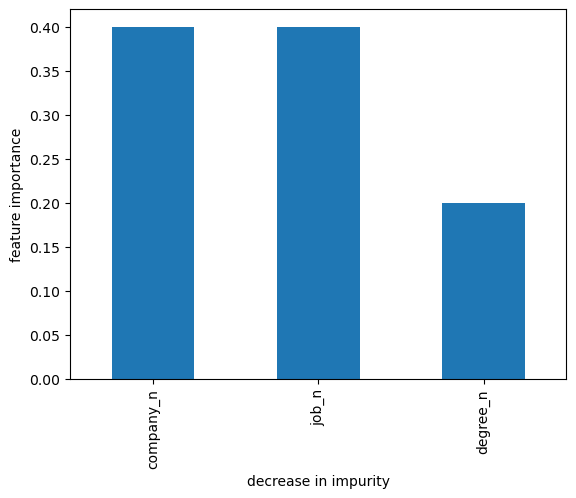

In [17]:
import matplotlib.pyplot as plt
importance.plot.bar()
plt.xlabel('decrease in impurity')
plt.ylabel('feature importance')
plt.show()

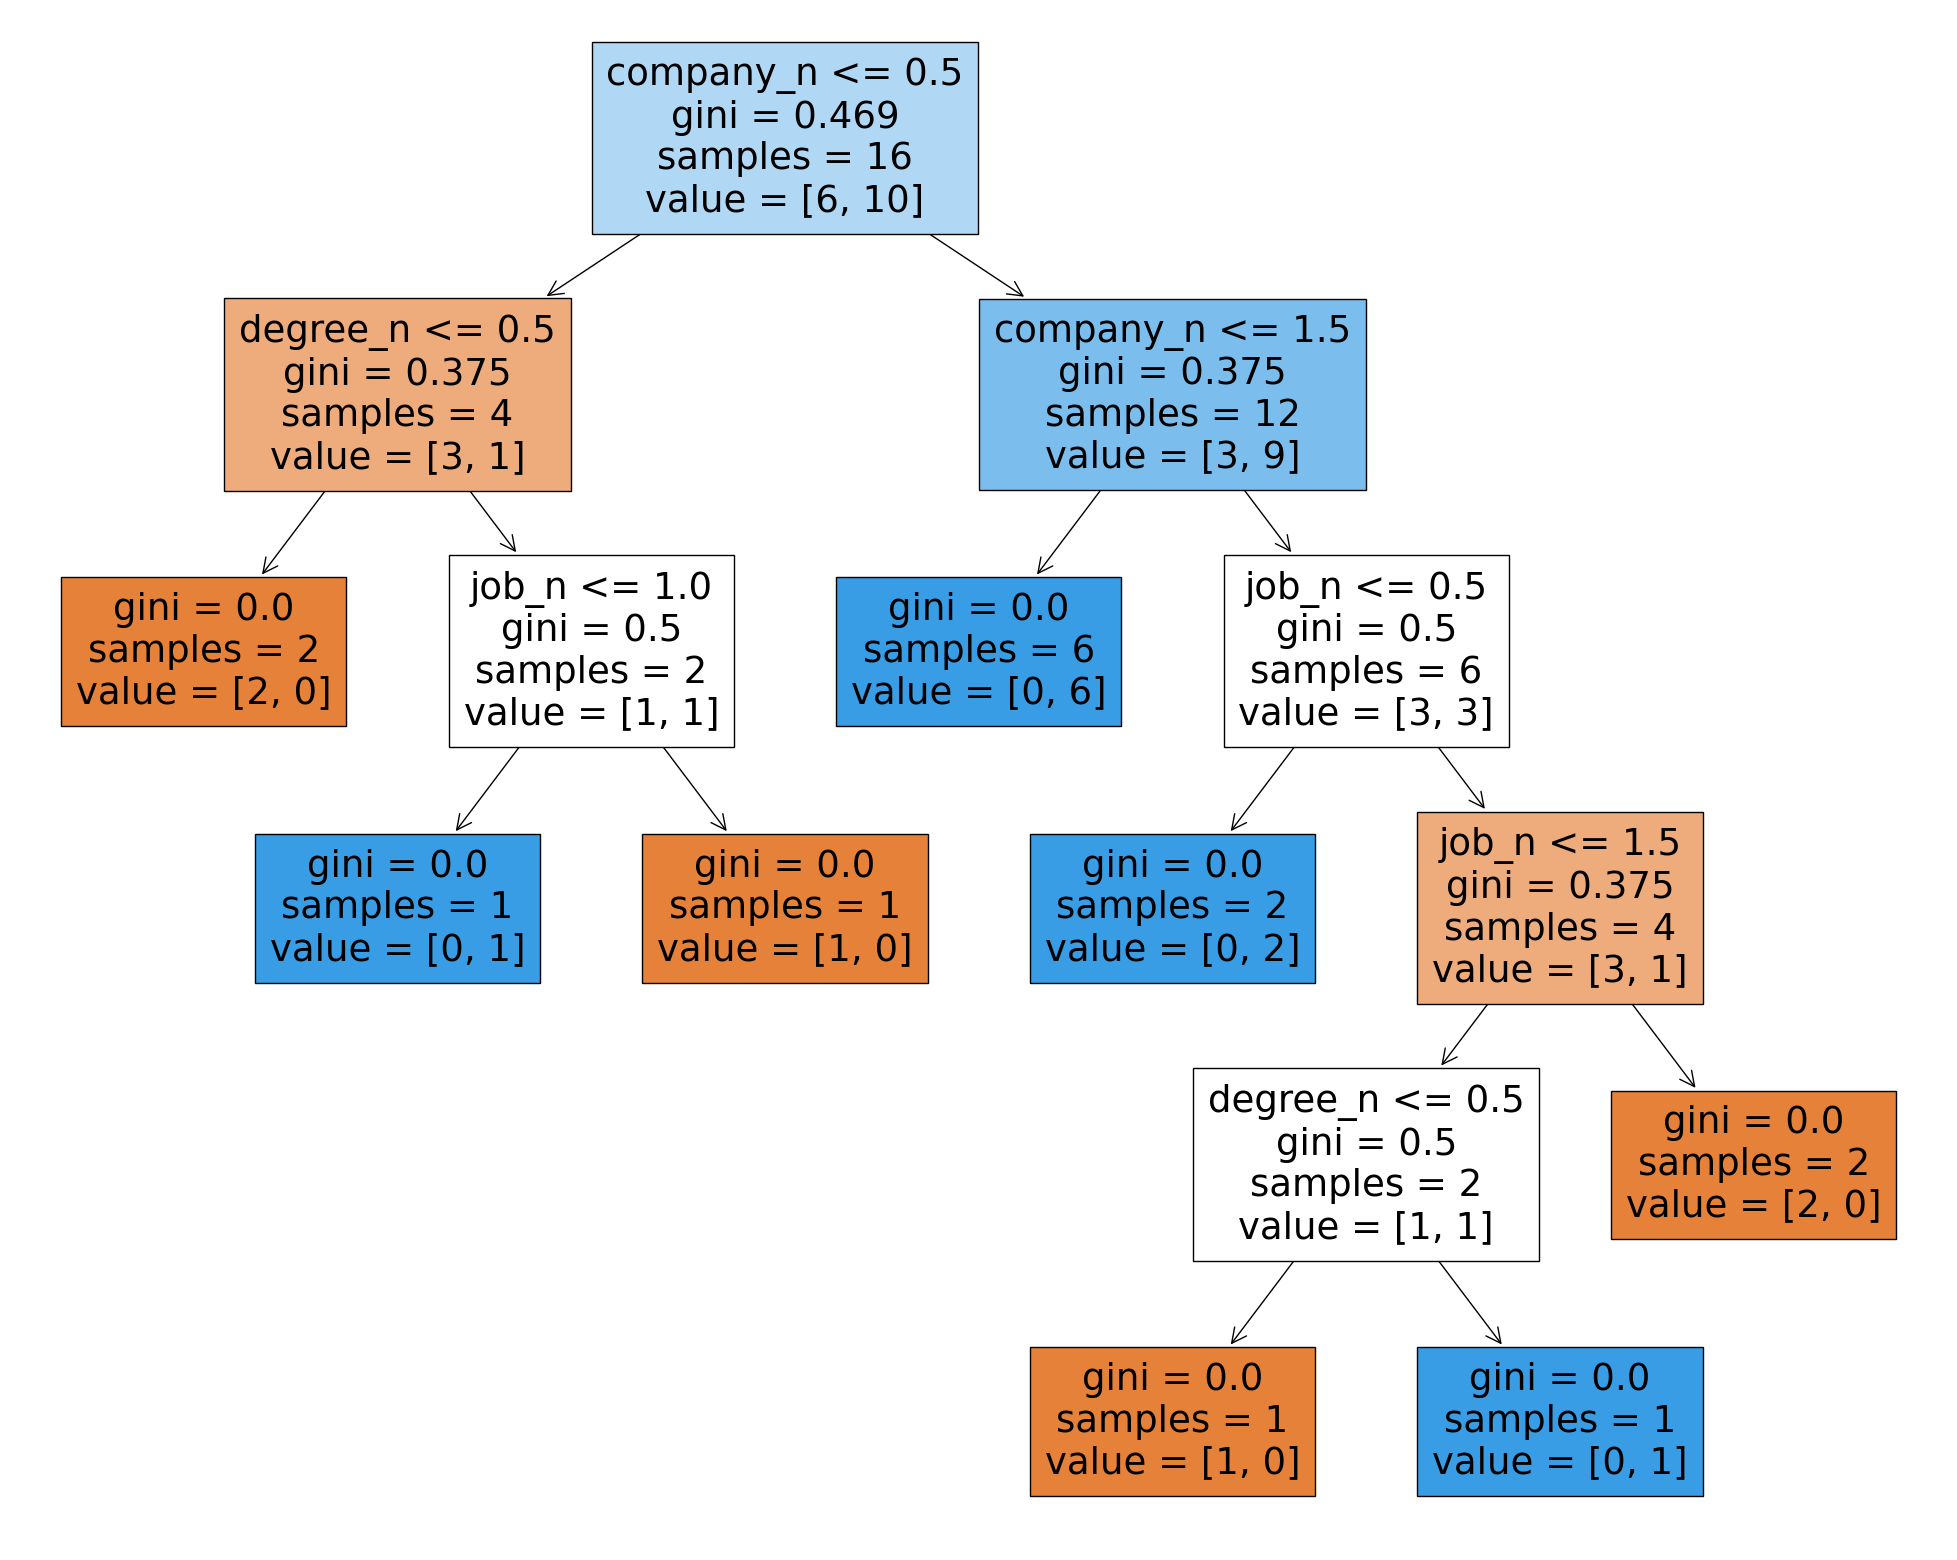

In [18]:
from sklearn import tree
fig=plt.figure(figsize=(25,20))
l=tree.plot_tree(model,feature_names=list(inputs.columns),filled=True)
fig.savefig('decisiontree')

In [19]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [20]:
tree_img=tree.export_graphviz(model,out_file='tree.dot',feature_names=inputs.columns,filled=True,max_depth=2)

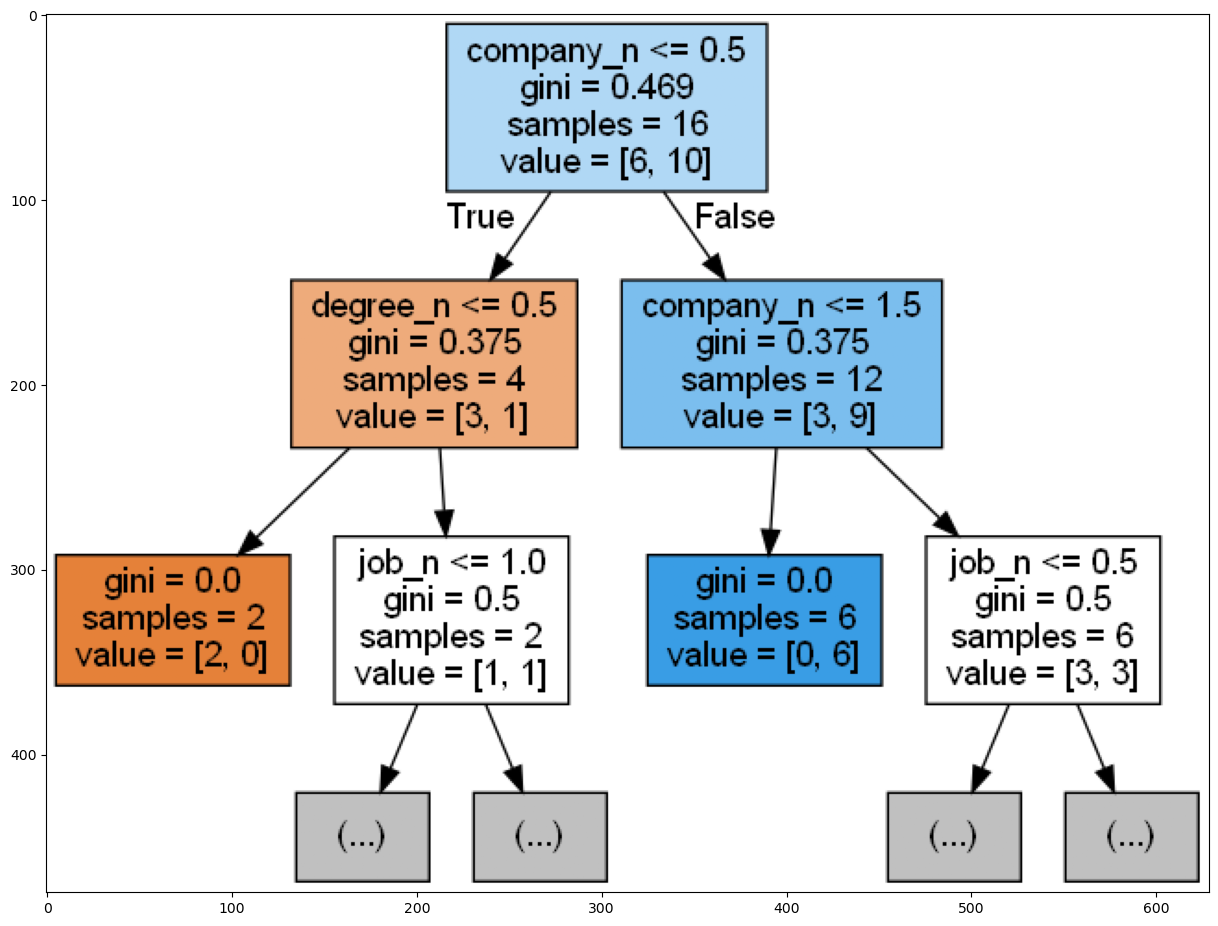

In [21]:
!dot -Tpng tree.dot -o tree.png
image=plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)